# **4. Analyze**

---

## **4.1 Prerequisites**



**Import libraries**

In [33]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the dataset**

In [ ]:
df = pd.read_csv('clean_lichess_games.csv', encoding = 'utf-8')
df

,Unnamed: 0,rated,turns,victory_status,winner,white_id,white_rating,black_id,black_rating,opening_eco,opening_name,opening_ply,game_category,white level,black level,Rating_Diff,Quality,winner condition,base_time,increment_time
0,0,False,13,outoftime,white,bourgris,1500,a-00,1191,D10,Slav Defense,5,rapid,Beginner,Beginner,309,Medium Quality,higher rating,15,2
1,1,True,16,resign,black,a-00,1322,skinnerua,1261,B00,Nimzowitsch Defense,4,blitz,Beginner,Beginner,61,High Quality,lower rating,5,10
2,2,True,61,mate,white,ischia,1496,a-00,1500,C20,King's Pawn Game,3,blitz,Beginner,Beginner,4,High Quality,higher rating,5,10
3,3,True,61,mate,white,daniamurashov,1439,adivanov2009,1454,D02,Queen's Pawn Game,3,rapid,Beginner,Beginner,15,High Quality,higher rating,20,0
4,4,True,95,mate,white,nik221107,1523,adivanov2009,1469,C41,Philidor Defense,5,rapid,Beginner,Beginner,54,High Quality,higher rating,30,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19108,20053,True,24,resign,white,belcolt,1691,jamboger,1220,A80,Dutch Defense,2,rapid,Intermediate,Beginner,471,Low Quality,higher rating,10,10
19109,20054,True,82,mate,black,jamboger,1233,farrukhasomiddinov,1196,A41,Queen's Pawn,2,rapid,Beginner,Beginner,37,High Quality,lower rating,10,0
19110,20055,True,35,mate,white,jamboger,1219,schaaksmurf3,1286,D00,Queen's Pawn Game,3,rapid,Beginner,Beginner,67,High Quality,higher rating,10,0
19111,20056,True,109,resign,white,marcodisogno,1360,jamboger,1227,B07,Pirc Defense,4,rapid,Beginner,Beginner,133,High Quality,higher rating,10,0


## **4.2 Answer questions**

**Question 3: Is there a difference in the performance of players across different openings when analyzed by rating groups?**

Initially, we define performance as **number of win games / total games**

**Step 1**: Get the top 10 most popular **opening_names**.

**Step 2**: Group the data by white level and opening name to calculate performance.

**Step 3**: Ensure all levels have the same top 10 opening names by filling missing ones with zeros.

**Step 4**: Calculate performance metrics (win, loss, draw rates) for each opening in each white level.

**Step 5**: Visualize the performance for each white level using bar charts.

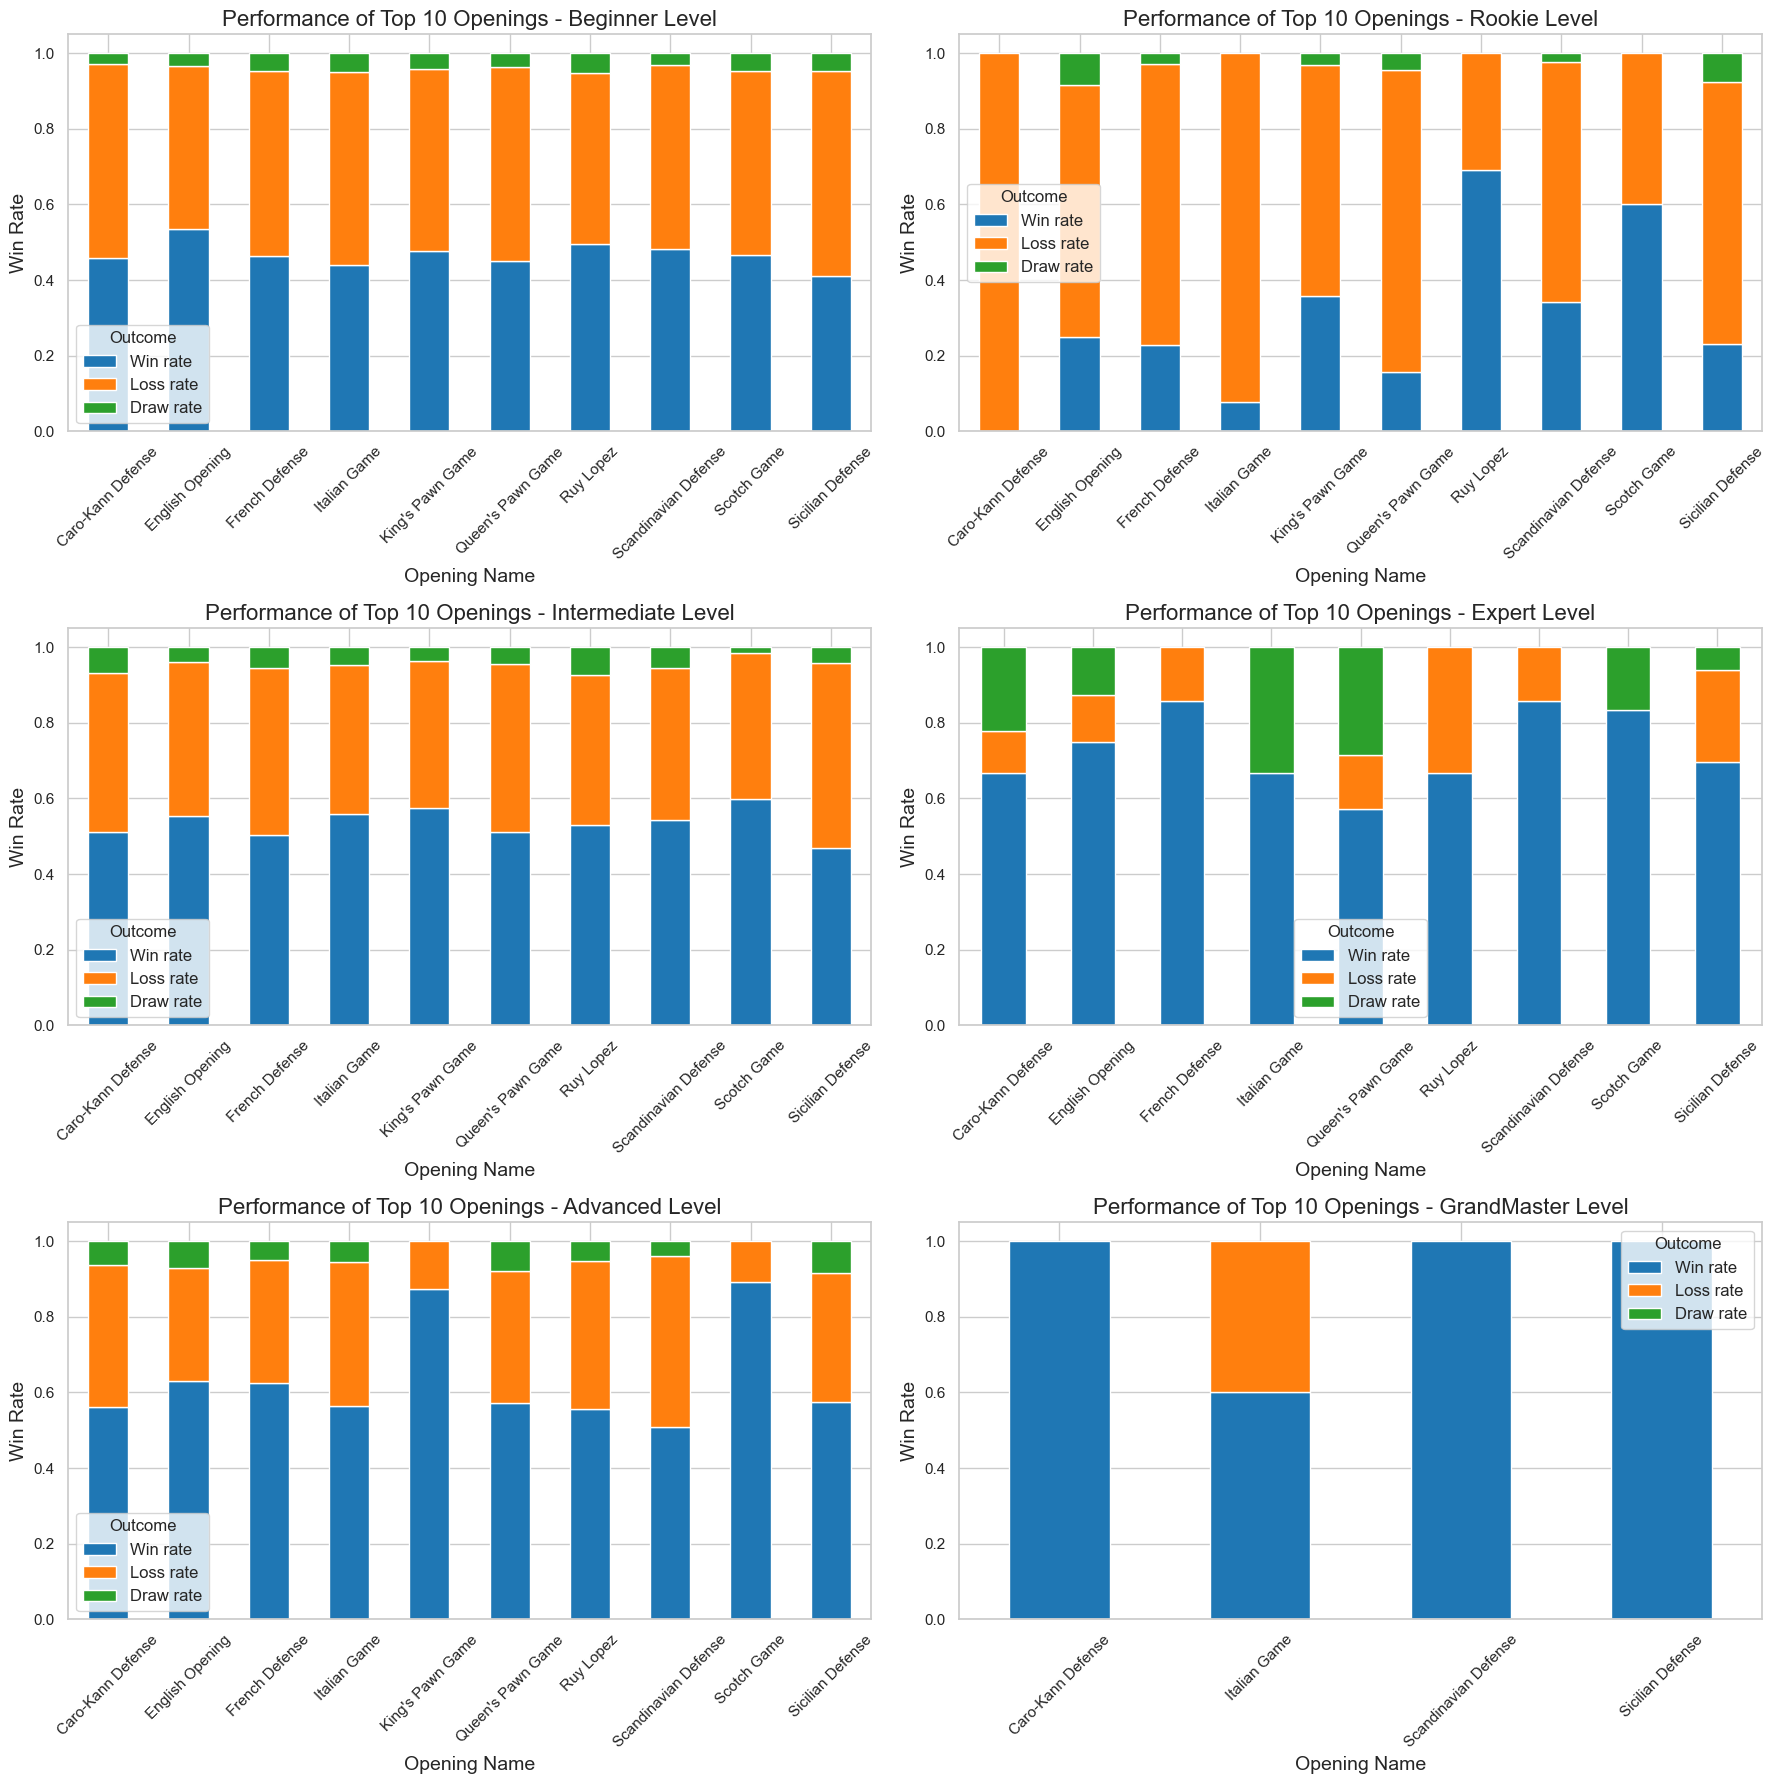

In [100]:
top_openings = df['opening_name'].value_counts().head(10).index
white_levels = df['white level'].unique()

filtered_data = df[df['opening_name'].isin(top_openings)]


performance_by_level = (
    filtered_data.groupby(['white level', 'opening_name', 'winner'])
    .size()
    .unstack()
    .fillna(0)
    .astype('int')
)

performance_by_level['total_games'] = performance_by_level.sum(axis=1)
performance_by_level['white_win_rate'] = performance_by_level['white'] / performance_by_level['total_games']
performance_by_level['black_win_rate'] = performance_by_level['black'] / performance_by_level['total_games']
performance_by_level['draw_rate'] = performance_by_level['draw'] / performance_by_level['total_games']


fig, axes = plt.subplots(3, 2, figsize=(18, 6 * 3))

axes = axes.flatten()

for idx, level in enumerate(white_levels):
    level_data = performance_by_level.loc[level]
    
    
    level_data[['white_win_rate', 'black_win_rate', 'draw_rate']].plot(
        kind='bar', 
        stacked=True, 
        color=['#1f77b4', '#ff7f0e', '#2ca02c'], 
        ax=axes[idx]
    )
    
    axes[idx].set_title(f'Performance of Top 10 Openings - {level} Level', fontsize=16)
    axes[idx].set_xlabel('Opening Name', fontsize=14)
    axes[idx].set_ylabel('Win Rate', fontsize=14)
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].legend(['Win rate', 'Loss rate', 'Draw rate'], title='Outcome', fontsize=12)

plt.tight_layout()
plt.show()
